Basado en [1](http://halweb.uc3m.es/esp/Personal/personas/jmmarin/esp/Boots/tema1BooPres.pdf)
y [2](http://halweb.uc3m.es/esp/Personal/personas/jmmarin/esp/Boots/tema2BooPres.pdf)

In [2]:
# Simul de datos de notas
mu = 6.5
sigma = 0.5
y = rnorm(n=20, mean=mu , sd=sigma)
y = round(y,3)
t = mean(y)
cat("La  muestra  ordenada  es", sort(y),"\n y se  obtiene  una  media  muestral  igual a ",t, "\n")

La  muestra  ordenada  es 5.645 5.706 5.941 5.958 6.054 6.27 6.368 6.385 6.408 6.438 6.445 6.526 6.674 6.691 6.781 6.785 6.828 7.161 7.46 7.641 
 y se  obtiene  una  media  muestral  igual a  6.50825 


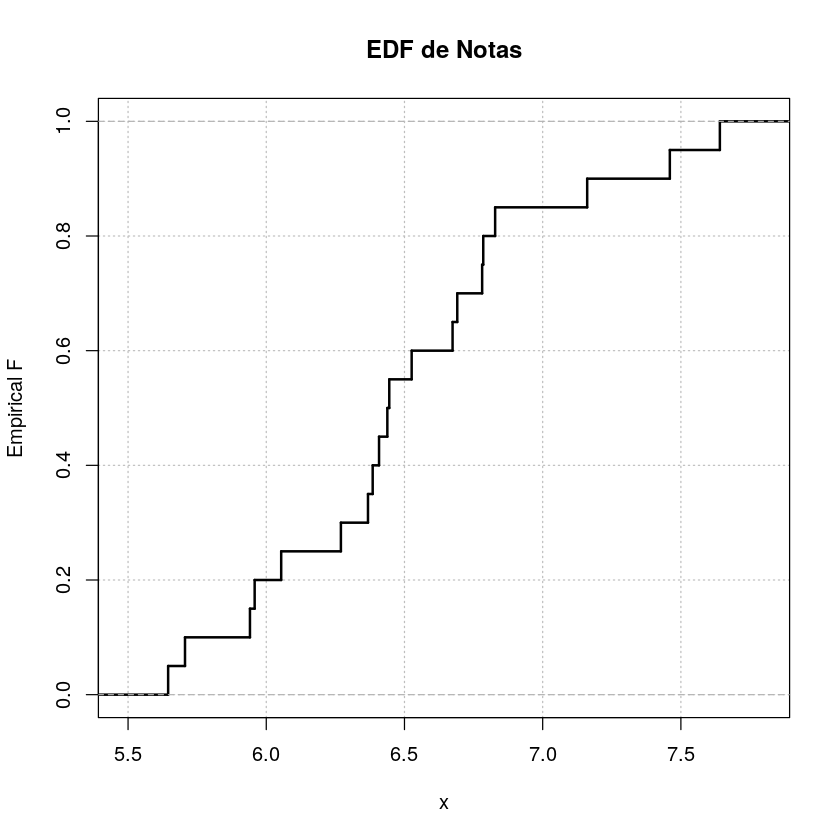

In [8]:
#EDF 
plot.ecdf(x=y, verticals=TRUE , do.p=FALSE ,main="EDF de Notas", lwd=2,panel.first=grid(col="gray",lty="dotted"),ylab="Empirical F")

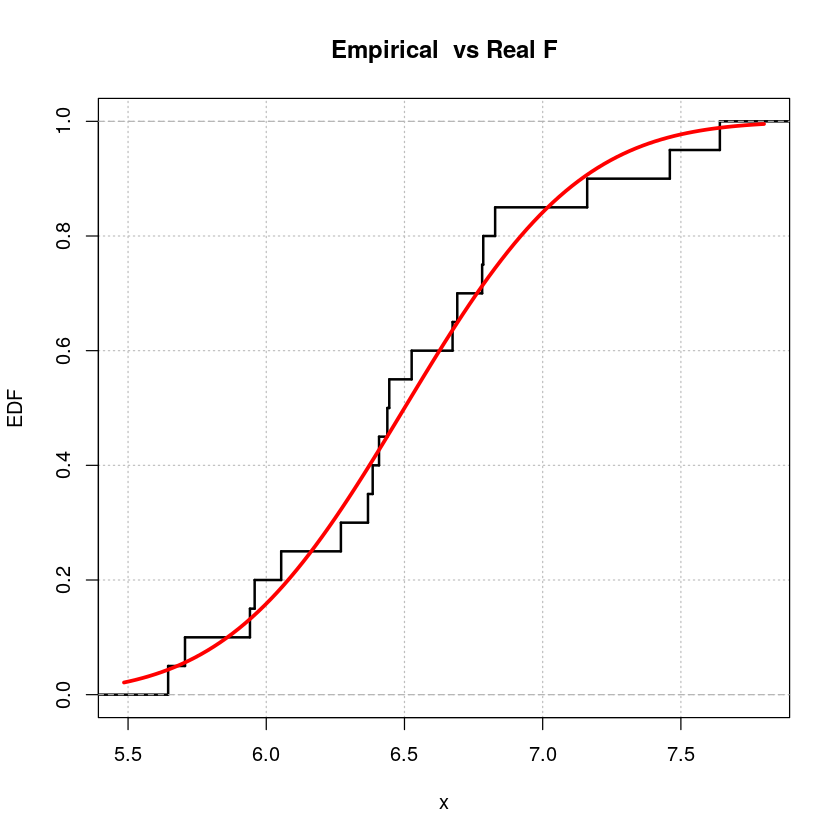

In [11]:
#Curva de la fd real
plot.ecdf(x=y, verticals=TRUE , do.p=FALSE ,main="Empirical  vs Real F", lwd=2, xlab="x",panel.first = grid(nx=NULL , ny=NULL ,col="gray", lty="dotted"), ylab="EDF")
curve(expr=pnorm(x, mean=mu, sd=sigma), col="red",add=TRUE , lw=3)

$\hat{Fn}(x) =\frac{\text{Num elementos de la muestra} \thinspace ≤x}{n}=\frac{1}{n}\sum_{i}^{n}{I{\text{{xi≤x}}}}$


In [15]:
#Se define una funci ́on para calcular la funci ́on de distribuci ́onemp ́ırica en cada punto:
x = rpois (20 ,3) 
# ej.  tomas  una  m.a.s  de una  Poisson
P = ecdf(x)
P(3)
acumula.dist = function(muestra , z){
    cuento = 0
    for(t in  muestra ){ if(t<=z) cuento = cuento +1 }
    return(cuento/length(muestra ))}
acumula.dist(x, 3)
#Para simular de la funci ́on de distribuci ́on emp ́ırica una vezobservado vectorx, se puede usar la funci ́onsample.sample(x, size=20,  replace=TRUE
sample(x, size=20,  replace=TRUE)

[1] 0.45

[1] 0.45

[1] 6 2 4 1 3 4 4 6 4 3 4 4 6 4 1 0 6 4 5 3

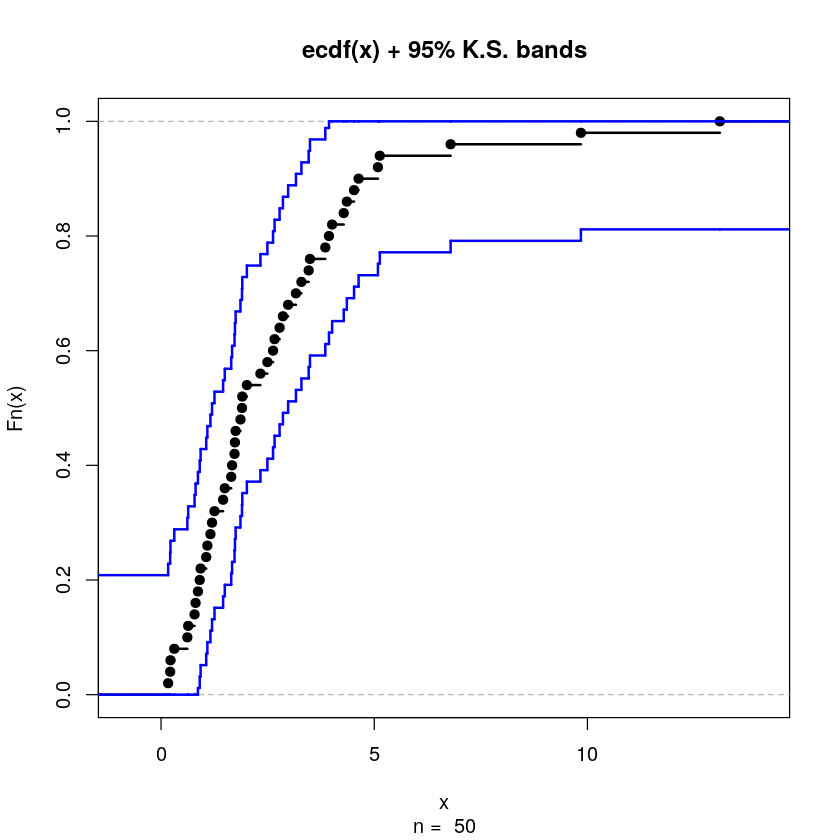

In [31]:
library(sfsmisc)
# Simulas  datos  de una  v.a.  chi  cuadrado  con 3 g.l.
x = rchisq (50,3)
X11()
ecdf.ksCI(x, ci.col="blue", lwd=2)

In [37]:
dkw_cota = function(datos , x, alfa){
    P = ecdf(datos)
    F_boina = P(x)
    epsilon = sqrt(log(2/alfa)/(2*length(datos )))
    inf_cota = pmax(F_boina  - epsilon , 0)
    sup_cota = pmin(F_boina + epsilon , 1)
    return(c(inf_cota , sup_cota))}
# Simulas  de una t de  Studentdkw_cota(datos ,  -0.5, 0.05)
datos = rt(20,3)
dkw_cota(datos ,  -0.5, 0.05)

[1] 0.1963193 0.8036807

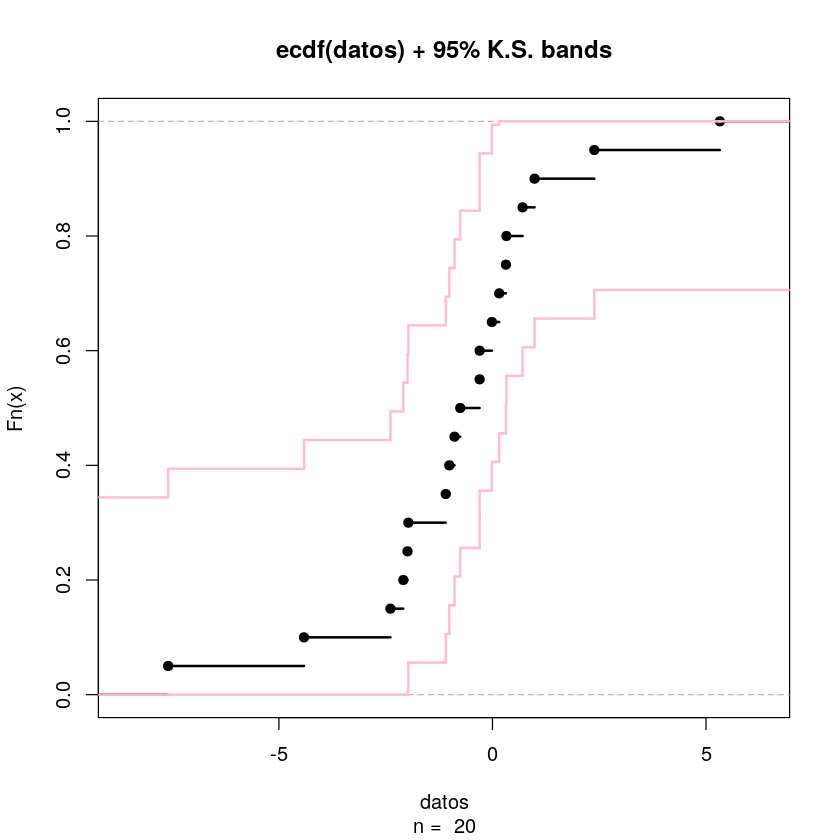

In [38]:
ecdf.ksCI(datos , ci.col="pink", lwd=2)

In [40]:
# Investigacion aspira
(teta = (104/11037)/(189/11034))
SE = sqrt(1/104 + 1/11037 + 1/189 + 1/11034)
LSup = log(teta) + qnorm(1-0.05/2)*SE
LInf = log(teta) - qnorm(1-0.05/2)*SE
exp(LInf)
exp(LSup)

[1] 0.550115

[1] 0.4324132

[1] 0.6998549

In [43]:
#Grafico de arbol ratones
Trata = c(94, 197, 16, 38, 99, 141, 23)
Cont = c(52, 104, 146, 10, 51, 30, 40, 27, 46)
# Grafico  stem -and -leaf de  grupo  tratamiento
stem(Trata ,scale =2)


  The decimal point is 1 digit(s) to the right of the |

   0 | 6
   2 | 38
   4 | 
   6 | 
   8 | 49
  10 | 
  12 | 
  14 | 1
  16 | 
  18 | 7



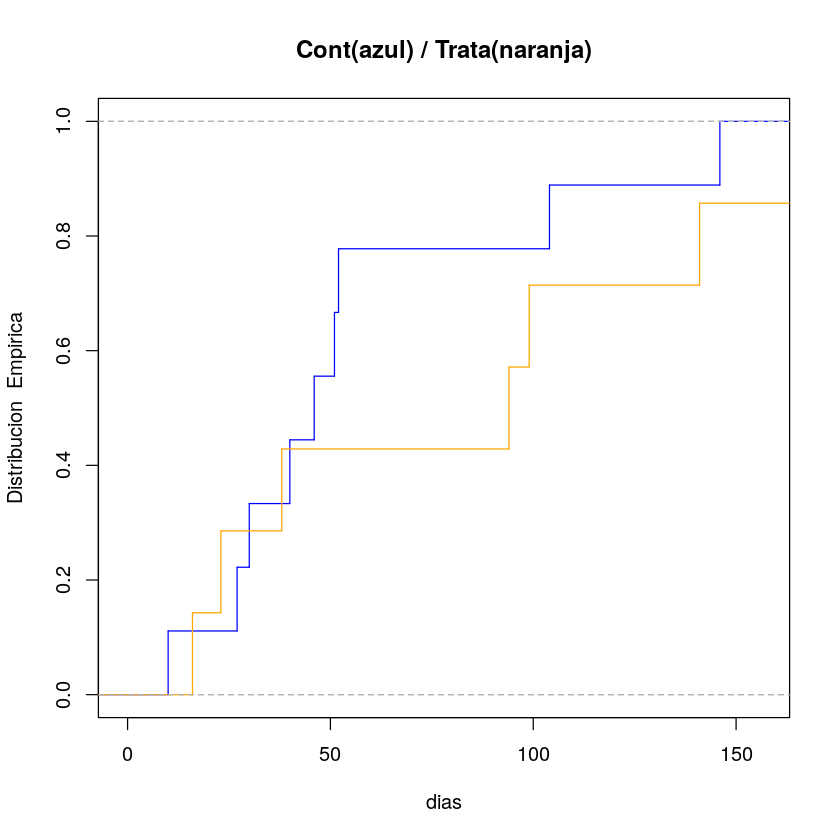

In [57]:
ecdf1 = ecdf(Trata)
ecdf2 = ecdf(Cont)

plot(ecdf2 , verticals=TRUE , do.points=FALSE  ,xlab="dias",ylab="Distribucion  Empirica",
     main="Cont(azul) / Trata(naranja)", col='blue' )
plot(ecdf1 , verticals=TRUE , do.points=FALSE , col='orange',add=TRUE )

In [58]:
mean(Trata)
mean(Cont)

[1] 86.85714

[1] 56.22222

In [60]:
(sdDiff =sqrt(var(Trata)/length(Trata )+var(Cont)/length(Cont )))

[1] 28.93607

In [62]:
# Aplicas  el TCL
(t = (mean(Trata) - mean(Cont)) / sdDiff)

[1] 1.058711

In [63]:
2*(1-pnorm(t))

[1] 0.2897316

In [67]:
# Pones  los  valores  en un solo  vector
# Defines  otro  vector  de 1’s y 2’s segun  su  grupo
x = matrix(c(Trata , Cont , rep(1,length(Trata)),rep(2, length(Cont))), ncol =2)
# t-test de  Student
t.test(x[,1] ~ x[,2])


	Welch Two Sample t-test

data:  x[, 1] by x[, 2]
t = 1.0587, df = 9.6545, p-value = 0.3155
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -34.15279  95.42263
sample estimates:
mean in group 1 mean in group 2 
       86.85714        56.22222 


In [69]:
#Se calcula el error est ́andar del estad ́ıstico media muestral.
#En el caso de lamediana muestral, ser ́ıa semejante sustituyendo elcomandomeanpormedianen el programa.
# Tama ̃nos  muestrales
n1 = length(Trata)
n2 = length(Cont)
n.bs = 1000    # numero  de  muestras  bootstrap
bs1 = rep(0,n.bs)
bs2 = rep(0,n.bs)
for (i in 1:n.bs) {bs1[i] = mean(sample(Trata , n1 , replace=TRUE))
                   bs2[i] = mean(sample(Cont , n2, replace=TRUE))}

[1] 27.96302

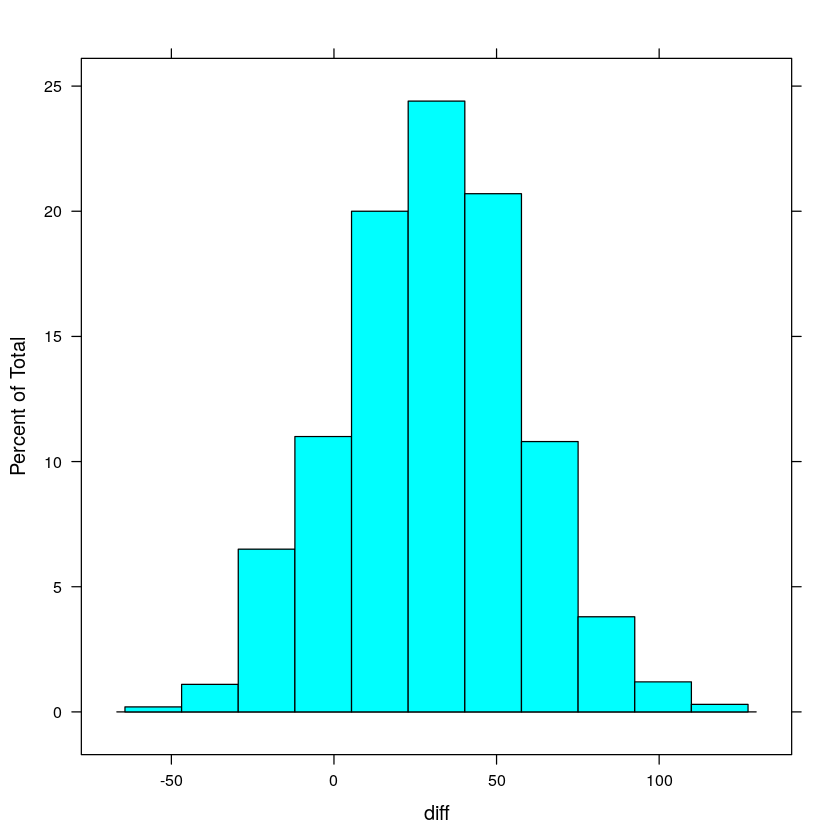

In [72]:
# replicas  bootstrap  de  estimadores  de las  diferencias
diff = bs1 -bs2
sd(diff)   # estima  error  estandar
# histograma  de  estimas  de las  diferencias
lattice :: histogram(diff)